In [68]:
from __future__ import print_function

import tensorflow as tf
from tensorflow.contrib import rnn

# Numpy libraries :
import numpy as np
import numpy.random as npr
import pandas as pd
import matplotlib.pyplot as plt

## Build a dataset:

In [5]:
## First get the dataset : using sinus function
def Construct_TS(noise_level=0.3, sin_level=3, log_smo=0.1):
    
    data = [np.log(log_smo*x) + sin_level*np.sin(x) + noise_level*npr.randn() for x in np.arange(10,400, 0.1)]
    data_len = len(data)
    print('Time series shape is : ', data_len)
    
    plt.plot(np.arange(10,400, 0.1), data)
    plt.show()
    
    return data, data_len

Time series shape is :  3900


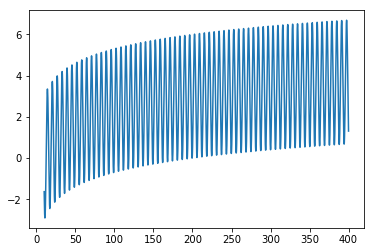

length of data :  3900


In [6]:
data, data_len = Construct_TS(noise_level=0, sin_level=3, log_smo=0.1)
print('length of data : ', data_len)

In [8]:
def GetDataset(input_num=150, output_num=10, lag= 20,
               noise_level=0.3, sin_level=3, log_smo=0.1):
    
    
    #Get the timeseries :
    TS, TS_len = Construct_TS(noise_level, sin_level, log_smo)
    
    # Get the dataset (input, output) :
    Input_data  = []
    Output_data = []
    
    for i in range(TS_len-180):
        x = np.array(TS[i:i+input_num]) # Get the input
        y = np.array(TS[i+input_num+lag:i+input_num+lag+output_num]) # Get the output
        Input_data.append(x) # fill the dataset
        Output_data.append(y)
    
    Input_data = np.array(Input_data)
    Output_data = np.array(Output_data)
    
    return Input_data, Output_data

Time series shape is :  3900


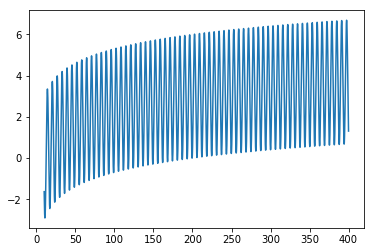

In [11]:
dataset, _ = GetDataset(noise_level=0, sin_level=3, log_smo=0.1)

In [36]:
dataset = np.expand_dims(dataset, 2)
print('The shape of data is : ', np.shape(dataset))

The shape of data is :  (3720, 150, 1)


In [69]:
# Training Parameters
learning_rate= 0.001
training_steps = 10000
batch_size = 128
display_step = 200
timesteps = 150
num_input = 1

In [74]:
tf.reset_default_graph()

## Define the Encoder : (2layers)
def encoder(x, num_layers, num_hidden):
    
    x = tf.unstack(x, timesteps, 1)

    # First layer of LSTM : 
    with tf.variable_scope('encoder_cell', reuse=tf.AUTO_REUSE) as scope:
        cell_ = []
        for i in range(num_layers):
            # first construct the lstm cell :
            lstm_cell = rnn.BasicLSTMCell(num_hidden, forget_bias=1.0)
            # Add the dropout operation :
            lstm_cell = tf.nn.rnn_cell.DropoutWrapper(lstm_cell, output_keep_prob=0.5)
            cell_.append(lstm_cell)
        
    with tf.variable_scope('encoder_RNNcell', reuse=tf.AUTO_REUSE) as scope:
        # Construct a RNN network with multiple layers (num_layers)
        cell = tf.nn.rnn_cell.MultiRNNCell(cell_)        
    
    with tf.variable_scope('encoder_Lstm', reuse=tf.AUTO_REUSE) as scope:
        #Get the structure :
        outputs, states = rnn.static_rnn(cell, x, dtype=tf.float32)

    return outputs[-1]

In [75]:
"""
## Test the encoder :

X= tf.placeholder("float", [None, timesteps, num_input])
l_ = encoder(X, 1, 500)

init_global = tf.global_variables_initializer()
init_local = tf.local_variables_initializer()

with tf.Session() as sess :
    
    sess.run(init_global)
    sess.run(init_local)

    x_ = dataset[:20]
    #l = sess.run(tf.unstack(x_, timesteps, 1))
    l = sess.run(l_, feed_dict={X: x_})
    print(np.shape(l))
"""    

(20, 500)
